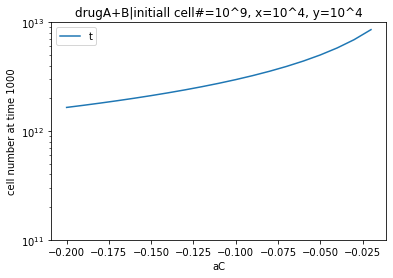

<Figure size 432x288 with 0 Axes>

In [1]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 

initial_N = 10**9
t_end = 1000

# aC = -0.064
bC = -0.0335
cC = -0.0335
fC = 0.022
gC = hC = kC = pC = qC =0.0000001
# paramsC = (aC, bC, cC, fC, gC, hC, kC, pC, qC)

x = list()
finalnumber = list()

for aC in np.arange(-0.2, -0.01, 0.01):
    x.append(aC)
    paramsC = (aC, bC, cC, fC, gC, hC, kC, pC, qC)
    list_t = np.arange(0, t_end, 0.01)
    cell_init = (initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10)
    cells = odeint(func, cell_init, list_t, args = paramsC)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    finalnumber.append(celltotal[-1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, finalnumber)
fig = plt.figure()

ax.legend('total cell number')

ax.set_yscale('log')

# ax.set_xlim(0, 1)
ax.set_ylim(10**11, 10**13)
ax.set_xlabel('aC')
ax.set_ylabel('cell number at time 1000') 
ax.set_title('drugA+B|initiall cell#=10^9, x=10^4, y=10^4')

plt.show()